In [6]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

if __name__ == "__main__":
    df = pd.read_csv("aozora_8writers_multiple.csv",  delimiter=',')
    df["num_label"] = df.label.factorize()[0]
    df = shuffle(df)
    idx = int(np.round(len(df) * 0.9, 0))

    train_input_fn = tf.estimator.inputs.pandas_input_fn(
        df[:idx], df[:idx]["num_label"], num_epochs=None, shuffle=True)

    predict_test_input_fn = tf.estimator.inputs.pandas_input_fn(
        df[idx:], df[idx:]["num_label"], shuffle=False)

    embedded_text_feature_column = hub.text_embedding_column(
        key="text", 
        module_spec="https://tfhub.dev/google/nnlm-ja-dim128/1")

    estimator = tf.estimator.DNNClassifier(
        hidden_units=[512, 128],
        feature_columns=[embedded_text_feature_column],
        n_classes=8,
        optimizer=tf.train.AdagradOptimizer(learning_rate=0.003))

    estimator.train(input_fn=train_input_fn, steps=1000);
    test_eval_result = estimator.evaluate(input_fn=predict_test_input_fn)
    print("Test set accuracy: {accuracy}".format(**test_eval_result))

INFO:tensorflow:Using default config.


I0613 22:42:16.951297 4443588032 estimator.py:1739] Using default config.


W0613 22:42:16.955209 4443588032 estimator.py:1760] Using temporary folder as model directory: /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp3pMsFF


INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11ffc2f50>, '_model_dir': '/var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp3pMsFF', '_protocol': None, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_device_fn': None, '_experimental_distribute': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_evaluation_master': '', '_eval_distribute': None, '_train_distribute': None, '_master': ''}


I0613 22:42:16.959311 4443588032 estimator.py:201] Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11ffc2f50>, '_model_dir': '/var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp3pMsFF', '_protocol': None, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_device_fn': None, '_experimental_distribute': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_evaluation_master': '', '_eval_distribute': None, '_train_distribute': None, '_master': ''}


Instructions for updating:
Colocations handled automatically by placer.


W0613 22:42:16.974128 4443588032 deprecation.py:323] From /usr/local/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


W0613 22:42:16.988708 4443588032 deprecation.py:323] From /usr/local/lib/python2.7/site-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_queue_runner.py:62: __init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


W0613 22:42:16.993155 4443588032 deprecation.py:323] From /usr/local/lib/python2.7/site-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_functions.py:500: add_queue_runner (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


INFO:tensorflow:Calling model_fn.


I0613 22:42:17.002309 4443588032 estimator.py:1111] Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0613 22:42:17.072412 4443588032 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0613 22:42:17.105765 4443588032 saver.py:1483] Saver not created because there are no variables in the graph to restore


Instructions for updating:
Use tf.cast instead.


W0613 22:42:17.224792 4443588032 deprecation.py:323] From /usr/local/lib/python2.7/site-packages/tensorflow_estimator/python/estimator/canned/head.py:436: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


INFO:tensorflow:Done calling model_fn.


I0613 22:42:17.341475 4443588032 estimator.py:1113] Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


I0613 22:42:17.344501 4443588032 basic_session_run_hooks.py:527] Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


I0613 22:42:17.577847 4443588032 monitored_session.py:222] Graph was finalized.


INFO:tensorflow:Running local_init_op.


I0613 22:42:18.583825 4443588032 session_manager.py:491] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0613 22:42:19.281486 4443588032 session_manager.py:493] Done running local_init_op.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


W0613 22:42:19.308495 4443588032 deprecation.py:323] From /usr/local/lib/python2.7/site-packages/tensorflow/python/training/monitored_session.py:809: start_queue_runners (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


INFO:tensorflow:Saving checkpoints for 0 into /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp3pMsFF/model.ckpt.


I0613 22:42:19.614120 4443588032 basic_session_run_hooks.py:594] Saving checkpoints for 0 into /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp3pMsFF/model.ckpt.


INFO:tensorflow:loss = 262.8902, step = 1


I0613 22:42:21.416342 4443588032 basic_session_run_hooks.py:249] loss = 262.8902, step = 1


INFO:tensorflow:global_step/sec: 160.784


I0613 22:42:22.037935 4443588032 basic_session_run_hooks.py:680] global_step/sec: 160.784


INFO:tensorflow:loss = 202.03238, step = 101 (0.625 sec)


I0613 22:42:22.041605 4443588032 basic_session_run_hooks.py:247] loss = 202.03238, step = 101 (0.625 sec)


INFO:tensorflow:global_step/sec: 183.681


I0613 22:42:22.582365 4443588032 basic_session_run_hooks.py:680] global_step/sec: 183.681


INFO:tensorflow:loss = 175.4784, step = 201 (0.544 sec)


I0613 22:42:22.586098 4443588032 basic_session_run_hooks.py:247] loss = 175.4784, step = 201 (0.544 sec)


INFO:tensorflow:global_step/sec: 183.864


I0613 22:42:23.126240 4443588032 basic_session_run_hooks.py:680] global_step/sec: 183.864


INFO:tensorflow:loss = 157.87338, step = 301 (0.544 sec)


I0613 22:42:23.130409 4443588032 basic_session_run_hooks.py:247] loss = 157.87338, step = 301 (0.544 sec)


INFO:tensorflow:global_step/sec: 195.215


I0613 22:42:23.638494 4443588032 basic_session_run_hooks.py:680] global_step/sec: 195.215


INFO:tensorflow:loss = 170.87762, step = 401 (0.512 sec)


I0613 22:42:23.642272 4443588032 basic_session_run_hooks.py:247] loss = 170.87762, step = 401 (0.512 sec)


INFO:tensorflow:global_step/sec: 169.147


I0613 22:42:24.229701 4443588032 basic_session_run_hooks.py:680] global_step/sec: 169.147


INFO:tensorflow:loss = 153.54553, step = 501 (0.591 sec)


I0613 22:42:24.233609 4443588032 basic_session_run_hooks.py:247] loss = 153.54553, step = 501 (0.591 sec)


INFO:tensorflow:global_step/sec: 178.74


I0613 22:42:24.789172 4443588032 basic_session_run_hooks.py:680] global_step/sec: 178.74


INFO:tensorflow:loss = 145.81134, step = 601 (0.559 sec)


I0613 22:42:24.793025 4443588032 basic_session_run_hooks.py:247] loss = 145.81134, step = 601 (0.559 sec)


INFO:tensorflow:global_step/sec: 199.926


I0613 22:42:25.289350 4443588032 basic_session_run_hooks.py:680] global_step/sec: 199.926


INFO:tensorflow:loss = 159.1041, step = 701 (0.500 sec)


I0613 22:42:25.292977 4443588032 basic_session_run_hooks.py:247] loss = 159.1041, step = 701 (0.500 sec)


INFO:tensorflow:global_step/sec: 174.676


I0613 22:42:25.861848 4443588032 basic_session_run_hooks.py:680] global_step/sec: 174.676


INFO:tensorflow:loss = 144.0289, step = 801 (0.572 sec)


I0613 22:42:25.864948 4443588032 basic_session_run_hooks.py:247] loss = 144.0289, step = 801 (0.572 sec)


INFO:tensorflow:global_step/sec: 176.627


I0613 22:42:26.428034 4443588032 basic_session_run_hooks.py:680] global_step/sec: 176.627


INFO:tensorflow:loss = 128.22052, step = 901 (0.567 sec)


I0613 22:42:26.432004 4443588032 basic_session_run_hooks.py:247] loss = 128.22052, step = 901 (0.567 sec)


INFO:tensorflow:Saving checkpoints for 1000 into /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp3pMsFF/model.ckpt.


I0613 22:42:27.006119 4443588032 basic_session_run_hooks.py:594] Saving checkpoints for 1000 into /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp3pMsFF/model.ckpt.


INFO:tensorflow:Loss for final step: 146.33496.


I0613 22:42:29.298273 4443588032 estimator.py:359] Loss for final step: 146.33496.


INFO:tensorflow:Calling model_fn.


I0613 22:42:29.318130 4443588032 estimator.py:1111] Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0613 22:42:29.336400 4443588032 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0613 22:42:29.368310 4443588032 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


I0613 22:42:29.576179 4443588032 estimator.py:1113] Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-06-13T13:42:29Z


I0613 22:42:29.597891 4443588032 evaluation.py:257] Starting evaluation at 2019-06-13T13:42:29Z


INFO:tensorflow:Graph was finalized.


I0613 22:42:29.713815 4443588032 monitored_session.py:222] Graph was finalized.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


W0613 22:42:29.716933 4443588032 deprecation.py:323] From /usr/local/lib/python2.7/site-packages/tensorflow/python/training/saver.py:1266: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp3pMsFF/model.ckpt-1000


I0613 22:42:29.721216 4443588032 saver.py:1270] Restoring parameters from /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp3pMsFF/model.ckpt-1000


INFO:tensorflow:Running local_init_op.


I0613 22:42:30.422714 4443588032 session_manager.py:491] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0613 22:42:31.118032 4443588032 session_manager.py:493] Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2019-06-13-13:42:31


I0613 22:42:31.602277 4443588032 evaluation.py:277] Finished evaluation at 2019-06-13-13:42:31


INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.5832131, average_loss = 1.1751641, global_step = 1000, loss = 148.07068


I0613 22:42:31.605271 4443588032 estimator.py:1979] Saving dict for global step 1000: accuracy = 0.5832131, average_loss = 1.1751641, global_step = 1000, loss = 148.07068


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp3pMsFF/model.ckpt-1000


I0613 22:42:31.744086 4443588032 estimator.py:2039] Saving 'checkpoint_path' summary for global step 1000: /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp3pMsFF/model.ckpt-1000


Test set accuracy: 0.583213090897


INFO:tensorflow:Calling model_fn.


I0613 22:43:36.053256 4443588032 estimator.py:1111] Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0613 22:43:36.083014 4443588032 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0613 22:43:36.136838 4443588032 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


I0613 22:43:36.255620 4443588032 estimator.py:1113] Done calling model_fn.


INFO:tensorflow:Graph was finalized.


I0613 22:43:36.367902 4443588032 monitored_session.py:222] Graph was finalized.


INFO:tensorflow:Restoring parameters from /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp3pMsFF/model.ckpt-1000


I0613 22:43:36.371819 4443588032 saver.py:1270] Restoring parameters from /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp3pMsFF/model.ckpt-1000


INFO:tensorflow:Running local_init_op.


I0613 22:43:37.025011 4443588032 session_manager.py:491] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0613 22:43:37.663600 4443588032 session_manager.py:493] Done running local_init_op.


Instructions for updating:
Use tf.cast instead.


W0613 22:43:38.169159 4443588032 deprecation.py:323] From /usr/local/lib/python2.7/site-packages/tensorflow/python/ops/confusion_matrix.py:193: to_int64 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


W0613 22:43:38.172746 4443588032 deprecation.py:323] From /usr/local/lib/python2.7/site-packages/tensorflow/python/ops/confusion_matrix.py:194: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


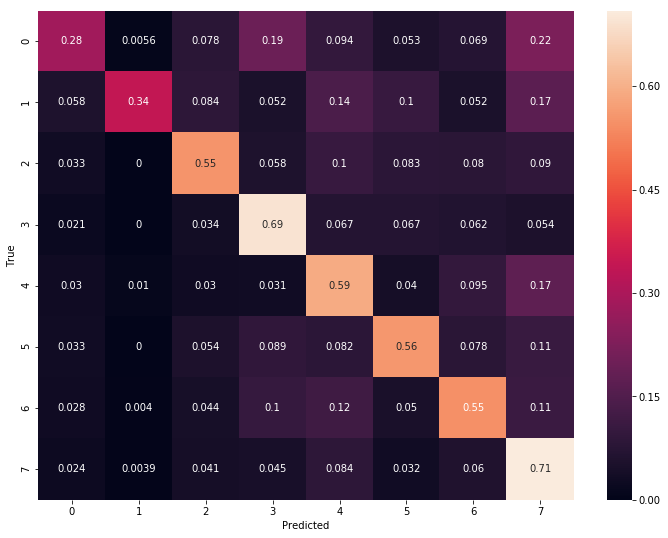

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_predictions(estimator, input_fn):
  return [x["class_ids"][0] for x in estimator.predict(input_fn=input_fn)]

LABELS = range(8)

# Create a confusion matrix on training data.
with tf.Graph().as_default():
  cm = tf.confusion_matrix(df[idx:]["num_label"], 
                           get_predictions(estimator, predict_test_input_fn))
  with tf.Session() as session:
    cm_out = session.run(cm)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) / cm_out.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 9))
sns.heatmap(cm_out, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.xlabel("Predicted");
plt.ylabel("True");